<a href="https://colab.research.google.com/github/ryosanada/kuzushiji_1/blob/main/notebook/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import io
from PIL import Image
import zipfile
import matplotlib.pyplot as plt

In [ ]:
# path
path_train_4 = '/content/drive/MyDrive/Colab Notebooks/SIGNATE/くずし字認識チャレンジ①/data/train_4.zip'

In [ ]:
def import_from_zip(zip_path):
    # 配列格納用のList
    img_data = []
    img_filename = []
    annot_data = []
    annot_filename = []

    # zipの読み込み
    with zipfile.ZipFile(zip_path, 'r') as zip_file:
        # zipファイル内の各ファイルについてループ
        for info in zip_file.infolist():
            # 画像ファイルの場合
            if info.filename.endswith('.jpg'):
                img_filename.append(info.filename[:-4])
                # 対象の画像ファイルを開く
                with zip_file.open(info.filename) as img_file:
                    # 画像のバイナリデータを読み込む
                    img_bin = io.BytesIO(img_file.read())
                    # バイナリデータをpillowから開く
                    img = Image.open(img_bin)
                    # 画像データを配列化
                    img_array = np.array(img)
                    # 格納用のListに追加
                    img_data.append(img_array)
             
            # アノテーションファイルの場合
            if info.filename.endswith('.tsv'):
                annot_filename.append(info.filename[:-4])
                # 対象の画像ファイルを開く
                with zip_file.open(info.filename) as annot_file:
                    annot = np.loadtxt(annot_file, delimiter="\t")
                    annot_data.append(annot)
    
    # filenameが順番通りか確認
    if img_filename != annot_filename:
        raise Exception("filenameが順番通りじゃない")

	# 処理が完了後、np.arrayに変換
    return np.array(img_data), np.array(annot_data), np.array(img_filename)

In [ ]:
train_4_img, train_4_annot, train_4_filename = import_from_zip(path_train_4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
print(train_4_img.shape)
print(train_4_img[0].shape)
print(train_4_annot.shape)
print(train_4_annot[0].shape)
print(train_4_filename.shape)

(45,)
(2669, 1950, 3)
(45,)
(11, 8)
(45,)


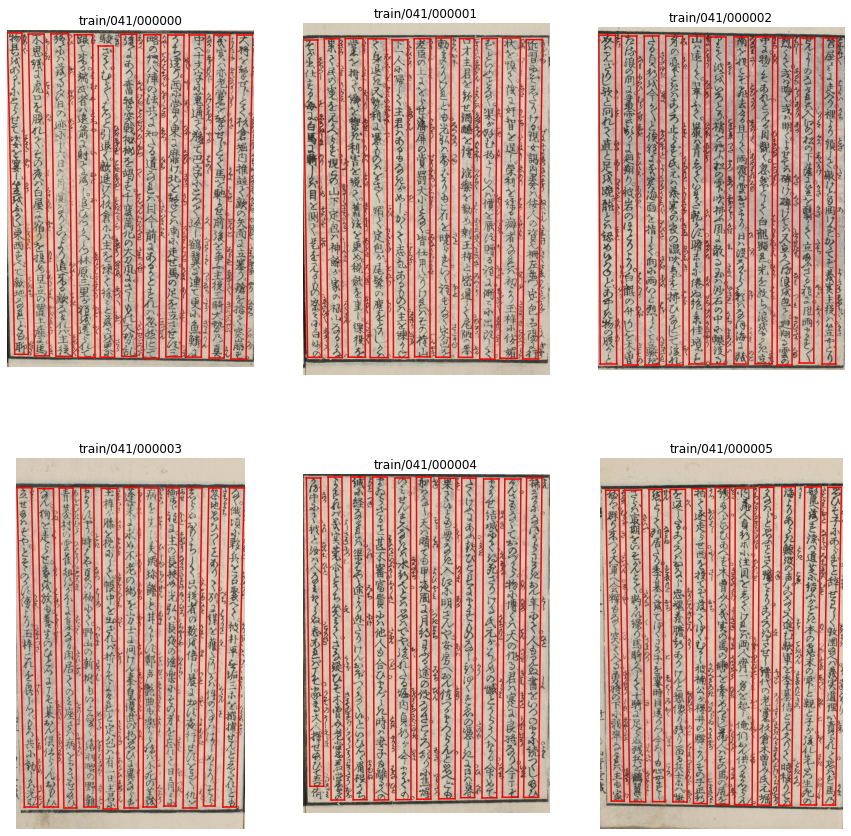

In [ ]:
row = 2
col = 3
fig, axes = plt.subplots(row, col, figsize=(15,15))

for i in range(6):
    ax = axes.ravel()[i]
    ax.set_title(train_4_filename[i])
    ax.imshow(train_4_img[i])
    for x1, y1, x2, y2, x3, y3, x4, y4 in train_4_annot[i]:
        ax.plot([x1, x2], [y1, y2], color="red")
        ax.plot([x2, x3], [y2, y3], color="red")
        ax.plot([x3, x4], [y3, y4], color="red")
        ax.plot([x4, x1], [y4, y1], color="red")

    ax.axis('off')
plt.show()
